In [1]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


# 1. Feature Extraction

In [1]:
import spacy

In [2]:
nlp=spacy.load('en_core_web_sm')

In [3]:
doc=nlp("Apple isn't looking at buying U.K. startup for $1 billion")

In [4]:
for token in doc:
    print(token.text)

Apple
is
n't
looking
at
buying
U.K.
startup
for
$
1
billion


### part_of_speech[POS]  Tagging

In [5]:
doc

Apple isn't looking at buying U.K. startup for $1 billion

In [6]:
for token in doc:
    print(token.text,token.lemma_)
#lemmatization: assigning the base form of words

Apple Apple
is be
n't not
looking look
at at
buying buy
U.K. U.K.
startup startup
for for
$ $
1 1
billion billion


In [7]:
for token in doc:
    print(f'{token.text:{15}} {token.lemma_:{15}} {token.pos_:{10}} {token.is_stop}')
#stop word: 별로 의미없는 단어

Apple           Apple           PROPN      False
is              be              AUX        True
n't             not             PART       True
looking         look            VERB       False
at              at              ADP        True
buying          buy             VERB       False
U.K.            U.K.            PROPN      False
startup         startup         NOUN       False
for             for             ADP        True
$               $               SYM        False
1               1               NUM        False
billion         billion         NUM        False


### dependency parsing

In [8]:
for chunk in doc.noun_chunks:
    print(f'{chunk.text:{15}} {chunk.root.text:{15}} {chunk.root.dep_}')

Apple           Apple           nsubj
U.K. startup    startup         dobj


### named entity recognition

In [9]:
doc

Apple isn't looking at buying U.K. startup for $1 billion

In [10]:
for ent in doc.ents:
    print(ent.text,ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


### sentence segmentation

In [11]:
doc

Apple isn't looking at buying U.K. startup for $1 billion

In [12]:
for sent in doc.sents:
    print(sent)

Apple isn't looking at buying U.K. startup for $1 billion


In [13]:
doc1=nlp('welcome to kgp talkie... thanks for... watching. Thanks for watching! thank you')

In [14]:
for token in doc1:
    print(token.text)

welcome
to
kgp
talkie
...
thanks
for
...
watching
.
Thanks
for
watching
!
thank
you


In [15]:
for sent in doc1.sents:
    print(sent)

welcome to kgp talkie...
thanks for... watching.
Thanks for watching!
thank you


### visualization

In [16]:
from spacy import displacy

In [17]:
doc

Apple isn't looking at buying U.K. startup for $1 billion

In [18]:
displacy.render(doc,style='dep')

In [19]:
displacy.render(doc,style='dep',options={'compact':True,'distance':100})

In [20]:
displacy.render(doc,style='ent')

# 2. Rule-based Text Phrase Extraction and Matching

In [21]:
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

In [22]:
nlp=spacy.load('en_core_web_sm')

In [23]:
doc=nlp('Hello World!')

In [24]:
doc

Hello World!

In [25]:
for token in doc:
    print(token)

Hello
World
!


In [26]:
pattern=[{'LOWER':'hello'},{'IS_PUNCT':True,'OP':'?'},{'LOWER':'world'}]

In [27]:
matcher=Matcher(nlp.vocab)
matcher.add('HelloWorld',None,pattern)

In [28]:
doc=nlp('Hello, world!')

In [29]:
matches=matcher(doc)

In [30]:
matches

[(15578876784678163569, 0, 3)]

In [31]:
for token in doc:
    print(token)

Hello
,
world
!


In [32]:
for match_id,start,end in matches:
    string_id=nlp.vocab.strings[match_id]
    span=doc[start:end]
    print(match_id,string_id,start,end,span.text)

15578876784678163569 HelloWorld 0 3 Hello, world


### regular expression

In [33]:
from tensorflow.keras.preprocessing import image

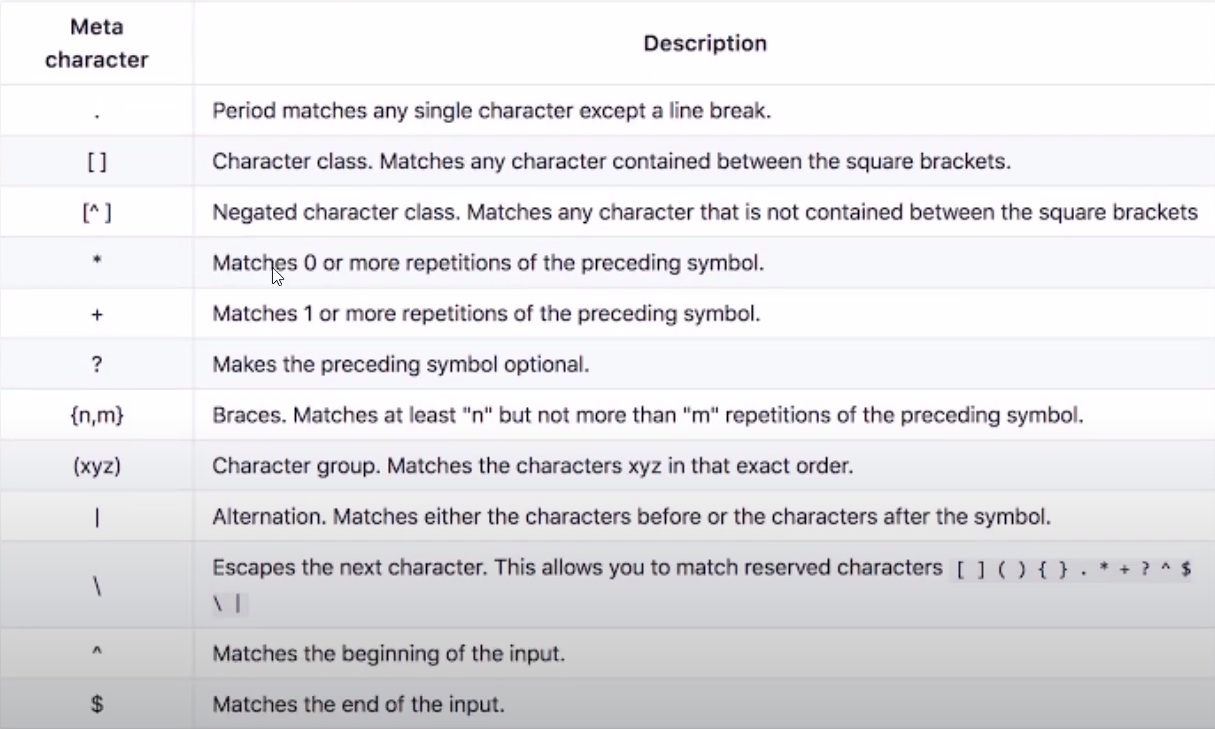

In [34]:
image1=image.load_img('data/image2.jpg')
image1

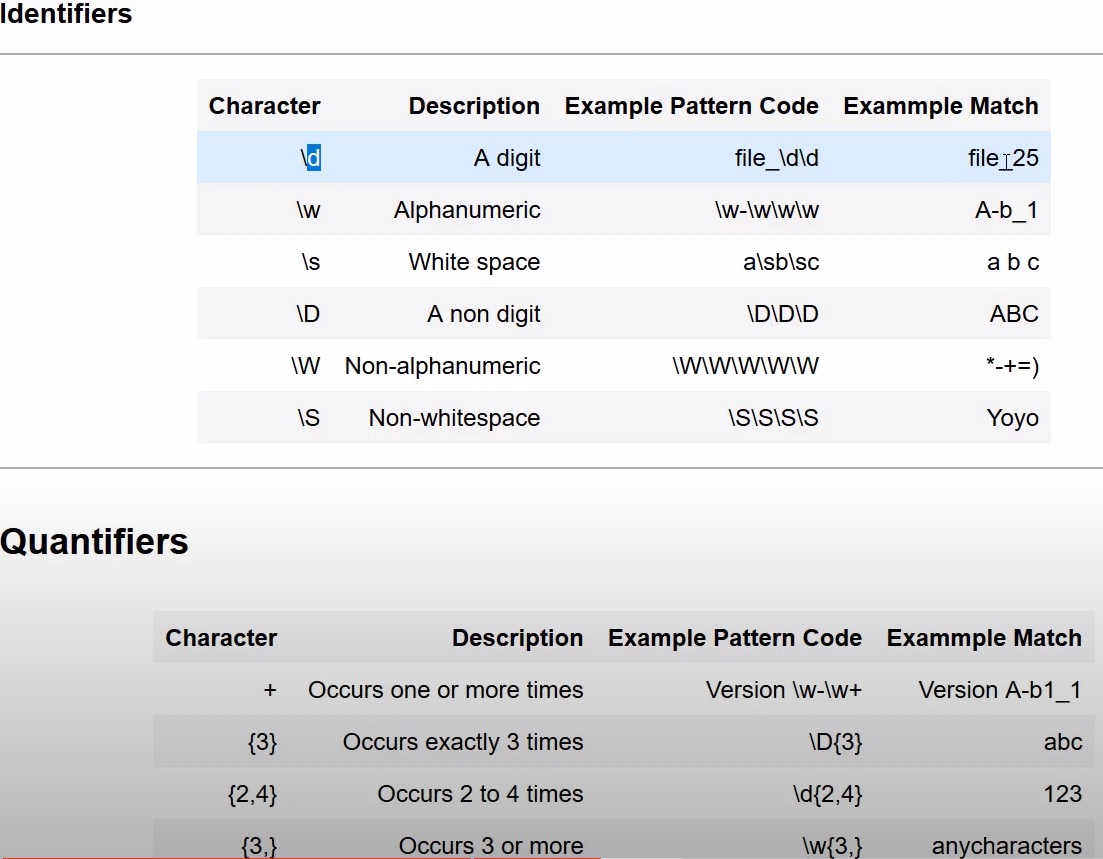

In [133]:
image1=image.load_img('data/image3.jpg')
image1

In [35]:
text='my phone number is 1256. ohh its wrong! Correct one is 1256348970. Call me!'

In [36]:
import re
#regular expression

In [37]:
re.search('\d{10}',text)

<re.Match object; span=(55, 65), match='1256348970'>

In [38]:
re.search('\d{4}',text)

<re.Match object; span=(19, 23), match='1256'>

In [40]:
re.search('\d{4,10}',text)

<re.Match object; span=(19, 23), match='1256'>

In [41]:
re.findall('\d{4,10}',text)

['1256', '1256348970']

In [42]:
re.findall('\w{4}',text)

['phon', 'numb', '1256', 'wron', 'Corr', '1256', '3489', 'Call']

In [43]:
re.findall('\s\w{4}\s',text)

[' Call ']

In [44]:
re.findall('\w{4,}',text)

['phone', 'number', '1256', 'wrong', 'Correct', '1256348970', 'Call']

#### wildcard text

In [45]:
re.findall('p....',text)

['phone']

In [46]:
re.findall('c..',text)

['ct ']

In [47]:
text="this is cat but not that. I want hat and cat both."

In [48]:
re.findall(r'.a.',text)

['cat', 'hat', 'wan', 'hat', ' an', 'cat']

In [49]:
text='2 hi thanks for watching <3'

In [50]:
re.findall(r'^\d',text)

['2']

In [51]:
re.findall(r'\d$',text)

['3']

#### Exclusion

In [52]:
text='2 hi thanks for watching <3'

In [53]:
re.findall(r'[^\d]+',text)

[' hi thanks for watching <']

In [54]:
text="you can get free-videos on kgp-talkie"

In [55]:
re.findall(r'[\w]+-[\w]+',text)

['free-videos', 'kgp-talkie']

#### regular expression in Spacy

In [56]:
text="Google announced a new Pixel at Google I/O . Google I/O is a great place to get all updates from Google."

In [57]:
pattern=[{'TEXT':'Google'},{'TEXT':'I'},{'TEXT':'/'},{'TEXT':'O'}]

In [58]:
def callback_method(matcher,doc,i,matches):
    match_id,start,end = matches[i]
    entity=doc[start:end]
    print(entity.text)

In [59]:
matcher=Matcher(nlp.vocab)
matcher.add('asas',callback_method,pattern)

In [60]:
doc=nlp(text)

In [61]:
matcher(doc)

Google I/O
Google I/O


[(16065226390632291768, 6, 10), (16065226390632291768, 11, 15)]

#### find word 'Google'

In [62]:
text="Google announced a new Pixel at Google I/O . Google I/O is a great place to get all updates from Google."

In [63]:
pattern=[{'TEXT':'Google'},{'TEXT':'I','OP':'?'},{'TEXT':'/','OP':'?'},{'TEXT':'O','OP':'?'}]

In [64]:
def callback_method(matcher,doc,i,matches):
    match_id,start,end = matches[i]
    entity=doc[start:end]
    print(entity.text)

In [65]:
matcher=Matcher(nlp.vocab)
matcher.add('asas',callback_method,pattern)

In [66]:
doc=nlp(text)

In [67]:
matcher(doc)

Google
Google
Google I
Google I/
Google I/O
Google
Google I
Google I/
Google I/O
Google


[(16065226390632291768, 0, 1),
 (16065226390632291768, 6, 7),
 (16065226390632291768, 6, 8),
 (16065226390632291768, 6, 9),
 (16065226390632291768, 6, 10),
 (16065226390632291768, 11, 12),
 (16065226390632291768, 11, 13),
 (16065226390632291768, 11, 14),
 (16065226390632291768, 11, 15),
 (16065226390632291768, 24, 25)]

# 3. Phone number, Email, Emoji extraction

In [68]:
matcher=Matcher(nlp.vocab)

In [69]:
matched_sents=[]

In [70]:
pattern=[{'LOWER':'facebook'},{'LEMMA':'be'},{'POS':'ADV','OP':'*'},{'POS':'ADJ'}]

In [71]:
def callback_method_fb(matcher,doc,i,matches):
    matched_id,start,end=matches[i]
    span=doc[start:end]
    sent=span.sent
    
    match_ents=[{'start':span.start_char - sent.start_char,
               'end':span.end_char - sent.start_char,
                'label':'MATCH'}]
    matched_sents.append({'text':sent.text, 'ents':match_ents})

In [72]:
matcher.add('fb',callback_method_fb,pattern)

In [73]:
doc=nlp("I'd say that Facebook is evil. - Facebook is pretty cool, right?")

In [74]:
matches=matcher(doc)

In [75]:
matches

[(8017838677478259815, 4, 7), (8017838677478259815, 9, 13)]

In [76]:
matched_sents

[{'text': "I'd say that Facebook is evil.",
  'ents': [{'start': 13, 'end': 29, 'label': 'MATCH'}]},
 {'text': '- Facebook is pretty cool, right?',
  'ents': [{'start': 2, 'end': 25, 'label': 'MATCH'}]}]

In [77]:
displacy.render(matched_sents,style='ent',manual=True)

#### phone number

In [80]:
pattern=[{'ORTH':'('},{'SHAPE':'ddd'},{'ORTH':')'},{'SHAPE':'dddd'},{'ORTH':'-','OP':'?'},{'SHAPE':'dddd'}]

In [81]:
matcher=Matcher(nlp.vocab)
matcher.add('PhoneNumber',None,pattern)

In [82]:
doc=nlp('Call me at (123) 4567 8901 or (987) 6161-8901')

In [83]:
print([t.text for t in doc])

['Call', 'me', 'at', '(', '123', ')', '4567', '8901', 'or', '(', '987', ')', '6161', '-', '8901']


In [84]:
matches=matcher(doc)
matches

[(7978097794922043545, 3, 8), (7978097794922043545, 9, 15)]

In [85]:
for match_id,start,end in matches:
    span=doc[start:end]
    print(span.text)

(123) 4567 8901
(987) 6161-8901


#### E-mail address

In [86]:
pattern=[{'TEXT':{'REGEX':'[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+'}}]

In [87]:
matcher=Matcher(nlp.vocab)
matcher.add('Email',None,pattern)

In [88]:
text="Email me at email2me@kgptalkie.com and talk.2me@kelptal.com"

In [89]:
doc=nlp(text)

In [90]:
matches=matcher(doc)
matches

[(11010771136823990775, 3, 4), (11010771136823990775, 5, 6)]

In [91]:
for match_id,start,end in matches:
    span=doc[start:end]
    print(span.text)

email2me@kgptalkie.com
talk.2me@kelptal.com


#### Hashtags and Emoji on social media

In [92]:
pos_emoji=['😀','😃','😄','😁','😆','😍']
neg_emoji=['😣','😖','😫','😩','😢','😭']

In [93]:
pos_emoji

['😀', '😃', '😄', '😁', '😆', '😍']

In [94]:
pos_pattern=[[{'ORTH':emoji}] for emoji in pos_emoji]
neg_pattern=[[{'ORTH':emoji}] for emoji in neg_emoji]

In [95]:
def label_sentiment(matcher,doc,i,matches):
    match_id,start,end=matches[i]
    if doc.vocab.strings[match_id]=='HAPPY':
        doc.sentiment +=0.1
    elif doc.vocab.strings[match_id]=='SAD':
        doc.sentiment -=0.1

In [96]:
matcher=Matcher(nlp.vocab)

In [97]:
matcher.add('HAPPY',label_sentiment,*pos_pattern)
matcher.add('SAD',label_sentiment,*neg_pattern)

In [99]:
matcher.add('HASHTAG',None,[{'TEXT':'#'},{'IS_ASCII':True}])

In [100]:
doc=nlp('Hello world 😀 #kgptalkie.')

In [101]:
matches=matcher(doc)

In [103]:
for match_id,start,end in matches:
    string_id=doc.vocab.strings[match_id]
    span=doc[start:end]
    print(string_id,span.text)

HAPPY 😀
HASHTAG #kgptalkie


#### Phrase matching

In [104]:
from spacy.matcher import PhraseMatcher

In [105]:
matcher=PhraseMatcher(nlp.vocab)

In [106]:
terms=['BARAC OBAMA','ANGELA MERKEL','WASHINGTON D.C.']

In [107]:
pattern=[nlp.make_doc(text) for text in terms]

In [108]:
pattern

[BARAC OBAMA, ANGELA MERKEL, WASHINGTON D.C.]

In [109]:
matcher.add('term',None,*pattern)

In [123]:
doc=nlp('German Chancellor ANGELA MERKEL and US president BARAC OBAMA converse in the Oval Office in WASHINGTON D.C.')

In [124]:
doc

German Chancellor ANGELA MERKEL and US president BARAC OBAMA converse in the Oval Office in WASHINGTON D.C.

In [125]:
matches=matcher(doc)

In [126]:
for match_id,start,end in matches:
    span=doc[start:end]
    print(span.text)

ANGELA MERKEL
BARAC OBAMA
WASHINGTON D.C.


In [127]:
matches

[(4519742297340331040, 2, 4),
 (4519742297340331040, 7, 9),
 (4519742297340331040, 15, 17)]

#### custom-rule based entity recognition

In [142]:
from spacy.pipeline import EntityRuler

In [143]:
nlp=spacy.load('en_core_web_sm')

In [144]:
ruler=EntityRuler(nlp)

In [145]:
patterns=[{'label':'ORG','pattern':'KGP Talkie'},
         {'label':'GPE','pattern':[{'LOWER':'san'},{'LOWER':'francisco'}]}]

In [146]:
patterns

[{'label': 'ORG', 'pattern': 'KGP Talkie'},
 {'label': 'GPE', 'pattern': [{'LOWER': 'san'}, {'LOWER': 'francisco'}]}]

In [147]:
ruler.add_patterns(patterns)

In [148]:
nlp.add_pipe(ruler)

In [153]:
doc=nlp("KGP Talkie is opening its first big office in San Francisco.")

In [154]:
for ent in doc.ents:
    print(ent.text,ent.label_)

KGP Talkie PERSON
first ORDINAL
San Francisco GPE


# 4. Combining NLP models and Custom rules

### expanding name entity

In [197]:
import spacy 
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

In [198]:
nlp=spacy.load('en_core_web_sm')

In [199]:
doc1=nlp('Dr. Alex Smith chaired first board meeting at Google')

In [215]:
doc1

Dr. Alex Smith chaired first board meeting at Google

In [216]:
doc1.ents

(Alex Smith,)

In [217]:
print([(ent.text, ent.label_) for ent in doc1.ents])

[('Alex Smith', 'PERSON')]


In [227]:
for ent in doc1.ents:
    print(ent.start)

1


In [213]:
def add_title(doc):
    new_ents=[]
    for ent in doc1.ents:
        if ent.label_=='PERSON' and ent.start !=0:
                prev_token=doc[ent.start-1]
                if prev_token.text in ('Dr','Dr.','Mr','Mr.'):
                    new_ent=Span(doc,ent.start-1,ent.end,label=ent.label)
                    new_ents.append(new_ent)
                else:
                    new_ents.append(ent)
    doc.ents=new_ents
    return doc

In [229]:
nlp=spacy.load('en_core_web_sm')
nlp.add_pipe(add_title,after='ner')

In [230]:
doc1=nlp('Dr. Alex Smith chaired first board meeting at Google')

In [231]:
print([(ent.text, ent.label_) for ent in doc1.ents])

[('Dr. Alex Smith', 'PERSON')]


### Use of POS and Dep Parsing

In [247]:
nlp=spacy.load('en_core_web_sm')

In [248]:
doc=nlp('Dr. Alex Smith was working at Google')

In [249]:
displacy.render(doc,style='dep',options={'compact':True,'distance':100})

In [326]:
def get_person_orgs(doc):
    person_entities=[ent for ent in doc.ents if ent.label_=='PERSON']
    for ent in person_entities:
        head=ent.root.head
        if head.lemma_=='work':
            preps=[token for token in head.children if token.dep_=='prep']
            for prep in preps:
                orgs=[token for token in prep.children if token.ent_type_=='ORG']
                print({'person':ent,'orgs':orgs,'past':head.tag_=='VBD'})
    return doc

In [317]:
doc.ents

(Alex Smith,)

In [318]:
person_entities=[ent for ent in doc.ents if ent.label_=='PERSON']

In [319]:
person_entities

[Alex Smith]

In [320]:
for ent in person_entities:
    print(ent.root.head)

working


In [321]:
from spacy.pipeline import merge_entities

In [327]:
nlp=spacy.load('en_core_web_sm')

In [328]:
nlp.add_pipe(merge_entities)

In [329]:
nlp.add_pipe(get_person_orgs)

In [334]:
doc=nlp('Dr. Alex Smith was working at Google')

{'person': Alex Smith, 'orgs': [], 'past': False}


In [335]:
doc=nlp('Dr. Alex Smith worked at Google')

{'person': Alex Smith, 'orgs': [], 'past': True}


#### modifying model

In [357]:
def get_person_orgs(doc):
    person_entities=[ent for ent in doc.ents if ent.label_=='PERSON']
    for ent in person_entities:
        head=ent.root.head
        if head.lemma_=='work':
            preps=[token for token in head.children if token.dep_=='prep']
            for prep in preps:
                orgs=[token for token in prep.children if token.ent_type_=='ORG']
                
                aux=[token for token in head.children if token.dep_=='aux']
                past_aux=any(t.tag_=='VBD' for t in aux)
                past=head.tag_ =='VBD' or head.tag_ == 'VBG' and past_aux
            print({'person':ent,'orgs':orgs,'past':past})
    return doc

In [358]:
from spacy.pipeline import merge_entities

In [359]:
nlp=spacy.load('en_core_web_sm')

In [360]:
nlp.add_pipe(merge_entities)

In [361]:
nlp.add_pipe(get_person_orgs)

In [362]:
doc=nlp('Dr. Alex Smith was working at Google')

{'person': Alex Smith, 'orgs': [], 'past': True}


In [363]:
doc=nlp('Dr. Alex Smith worked at Google')

{'person': Alex Smith, 'orgs': [], 'past': True}
